<a href="https://colab.research.google.com/github/M-Awwab-Khan/most-comprehensive-movies-analysis/blob/main/Most_Comprehensive_Movies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Most Comprehensive Movies Analysis

## Download Dataset from Kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [3]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

100% 228M/228M [00:02<00:00, 102MB/s]
100% 228M/228M [00:02<00:00, 80.3MB/s]


In [4]:
! unzip "the-movies-dataset.zip"

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


## Loading Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CSV to Dataframe

In [82]:
movies = pd.read_csv('movies_metadata.csv')
keywords = pd.read_csv('keywords.csv')
credits = pd.read_csv('credits.csv')

<ipython-input-82-07bc07df984d>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')


In [83]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [84]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [85]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Before moving on, let's merge these datasets on id column

In [86]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [87]:
keywords.id = keywords.id.astype('str')
movies = movies.merge(keywords, on='id')

In [88]:
credits.id = credits.id.astype('str')
movies = movies.merge(credits, on='id')

In [89]:
movies.shape

(46628, 27)

There are total 46K+ rows and 27 Features in our dataset. Such a huge number. Now let's analyze the datatypes of different features

In [90]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  46628 non-null  object 
 1   belongs_to_collection  4574 non-null   object 
 2   budget                 46628 non-null  object 
 3   genres                 46628 non-null  object 
 4   homepage               8009 non-null   object 
 5   id                     46628 non-null  object 
 6   imdb_id                46611 non-null  object 
 7   original_language      46617 non-null  object 
 8   original_title         46628 non-null  object 
 9   overview               45633 non-null  object 
 10  popularity             46624 non-null  object 
 11  poster_path            46229 non-null  object 
 12  production_companies   46624 non-null  object 
 13  production_countries   46624 non-null  object 
 14  release_date           46540 non-null  object 
 15  re

## Correcting Datatypes

Let's first of all convert release date column to pandas datetime using pd.to_datetime

In [91]:
# df['release_year'] = pd.to_datetime(df['release_date']).dt.year
movies = movies[~((movies["release_date"].str.len() < 6))]
movies['release_year'] = pd.to_datetime(movies['release_date']).dt.year

In [92]:
movies['release_year'] = movies['release_year'].astype(int, errors='ignore')

In [93]:
movies['budget'] = movies['budget'].astype(int)

In [94]:
movies['popularity'] = movies['popularity'].astype(float)

Let's analyze missing values

<Axes: >

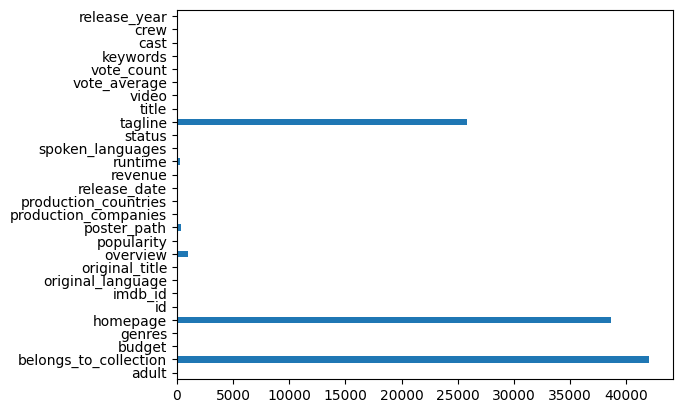

In [95]:
movies.isna().sum().plot(kind='barh')

## Handling Missing Values

Let's now remove unwanted columns from our dataset

In [96]:
columns_to_remove = ['belongs_to_collection', 'adult', 'tagline', 'homepage', 'release_date', 'video', 'spoken_languages', 'production_countries', 'imdb_id', 'production_companies']
movies = movies.drop(columns=columns_to_remove)

<Axes: >

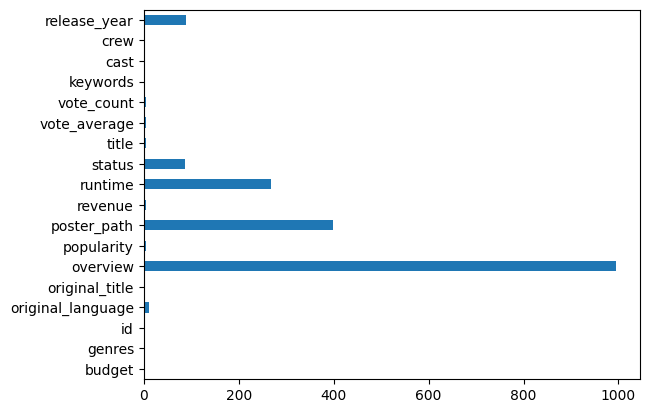

In [97]:
movies.isna().sum().plot(kind='barh')

In [98]:
import ast
def preprocess(text):
  lst = [dictionary['name'] for dictionary in ast.literal_eval(text)]
  if lst:
    return ', '.join(lst)
  return None

In [99]:
movies.genres = movies.genres.apply(preprocess)

In [100]:
movies.cast = movies.cast.apply(preprocess)

In [101]:
print(movies.iloc[0].crew)

[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depart

In [102]:
def extract_crew(text, job):
  for dictionary in ast.literal_eval(text):
    if dictionary['job'] == job:
      return dictionary['name']
  return None

In [103]:
movies['director'] = movies['crew'].apply(lambda x: extract_crew(x, 'Director'))

In [104]:
movies.drop(columns=['crew'], inplace=True)

In [105]:
movies.keywords = movies.keywords.apply(preprocess)
movies.keywords

0        jealousy, toy, boy, friendship, friends, rival...
1        board game, disappearance, based on children's...
2        fishing, best friend, duringcreditsstinger, ol...
3        based on novel, interracial relationship, sing...
4        baby, midlife crisis, confidence, aging, daugh...
                               ...                        
46623                                          tragic love
46624                                  artist, play, pinoy
46625                                                 None
46626                                                 None
46627                                                 None
Name: keywords, Length: 46628, dtype: object

<Axes: >

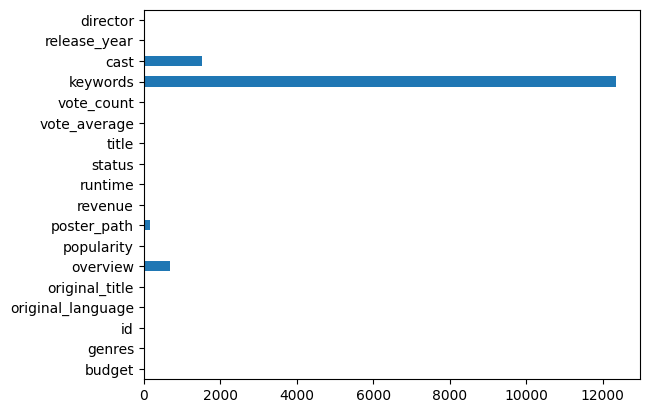

In [109]:
movies.isna().sum().plot(kind='barh')

In [107]:
movies = movies[movies['release_year'].notnull()]
movies = movies[movies['director'].notnull()]
movies = movies[movies['genres'].notnull()]

In [115]:
movies = movies.dropna(subset=['cast', 'overview', 'keywords'], how='any')

<Axes: >

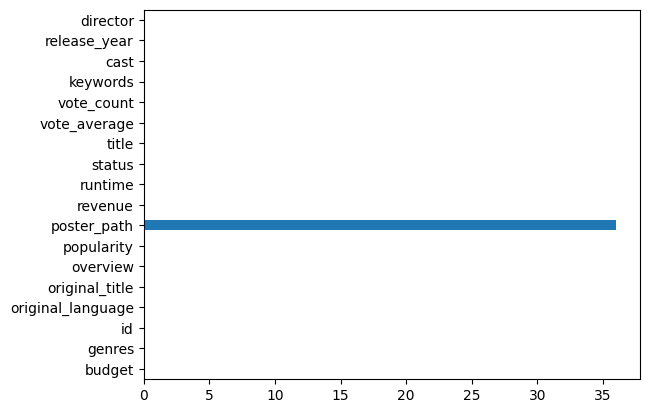

In [121]:
movies.isna().sum().plot(kind='barh')

In [118]:
movies.loc[movies['status'].isna(), 'status'] = 'Released'

In [120]:
movies.loc[movies['original_language'].isna(), 'original_language'] = 'en'

In [108]:
# Step 1: Group by 'genres' and calculate the average runtime for each genre
genre_avg_runtimes = movies.groupby('genres')['runtime'].mean().reset_index()

# Step 2: Merge the average runtimes back into the original dataframe
movies = pd.merge(movies, genre_avg_runtimes, on='genres', suffixes=('', '_avg'))

# Step 3: Replace missing values in 'runtime' with the average runtime of their genre
movies['runtime'] = movies['runtime'].fillna(movies['runtime_avg'])

# Step 4: Drop the redundant 'runtime_avg' column
movies.drop(columns='runtime_avg', inplace=True)

In [123]:
movies.tail()

,budget,genres,id,original_language,original_title,overview,popularity,poster_path,revenue,runtime,status,title,vote_average,vote_count,keywords,cast,release_year,director
43496,0,"Comedy, Action, Documentary",20776,en,Return to the Batcave: The Misadventures of Ad...,Adam West and Burt Ward are taken on a crazy a...,1.348822,/9jWkvwp9DNpUGAi57MiRwp3iYLJ.jpg,0.0,90.0,Released,Return to the Batcave: The Misadventures of Ad...,5.8,14.0,"robin, adam west, burt ward, super powers","Adam West, Burt Ward, Jack Brewer, Jason Marsd...",2003.0,Paul A. Kaufman
43497,0,"Horror, Action, Science Fiction, Comedy",43085,en,Dead and Deader,Lt. Bobby Quinn is a Special Forces commando k...,5.015147,/ofvuIqiOmeCbPAV8qUfSPDX5iy7.jpg,0.0,89.0,Released,Dead and Deader,5.8,10.0,"female nudity, infection, overweight woman, mu...","Dean Cain, Susan Ward, Guy Torry, Natassia Mal...",2006.0,Patrick Dinhut
43498,0,"Fantasy, Comedy, Romance, Drama",413421,hi,फिल्लौरी,A man is forced to marry a tree to ward off il...,0.600717,/zBsPbHNKMDu1hWowWoIVlnbSLJC.jpg,0.0,138.0,Released,Phillauri,7.1,11.0,"bad luck, spirit","Anushka Sharma, Diljit Dosanjh, Suraj Sharma, ...",2017.0,Anshai Lal
43500,0,"Comedy, Horror, Drama",434873,en,It Stains the Sands Red,"In the throes of a zombie apocalypse, A troubl...",8.471866,/rBCjDBa2Dau9WqEslCpdJni394M.jpg,0.0,92.0,Released,It Stains the Sands Red,5.6,21.0,"rape, cocaine, menstruation, stripper, murder,...","Brittany Allen, Juan Riedinger, Merwin Mondesi...",2016.0,Colin Minihan
43501,0,"Crime, Comedy, Action, Family",461297,en,Cop and a Half: New Recruit,In this family-friendly action reboot of the 1...,1.248353,/qRW0hlQaeGAtz6YBgzUbv9o8YVA.jpg,0.0,97.0,Released,Cop and a Half: New Recruit,6.0,1.0,"sequel, tv movie, buddy cop","Lou Diamond Phillips, Wallace Shawn, Gina Hold...",2017.0,Jonathan A. Rosenbaum
